Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5193.8062 - mae: 52.1812 - val_loss: 865.2817 - val_mae: 18.1239
Epoch 2/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 862.1354 - mae: 18.5768 - val_loss: 630.3226 - val_mae: 14.5489
Epoch 3/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 705.8574 - mae: 16.3654 - val_loss: 591.2747 - val_mae: 13.6647
Epoch 4/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 699.1674 - mae: 15.5759 - val_loss: 576.6332 - val_mae: 13.1965
Epoch 5/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 642.9861 - mae: 15.1936 - val_loss: 564.0773 - val_mae: 13.0219
Epoch 6/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 620.6447 - mae: 14.8973 - val_loss: 551.2766 - val_mae: 12.8193
Epoch 7/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 586.5713 - mae: 14.8683 - val_loss: 558.4824 - val_mae: 12.8672
Epoch 8/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 661.7217 - mae: 14.9443 - val_loss: 559.1059 - val_mae: 12.8767
Epoch 9/10
312/312

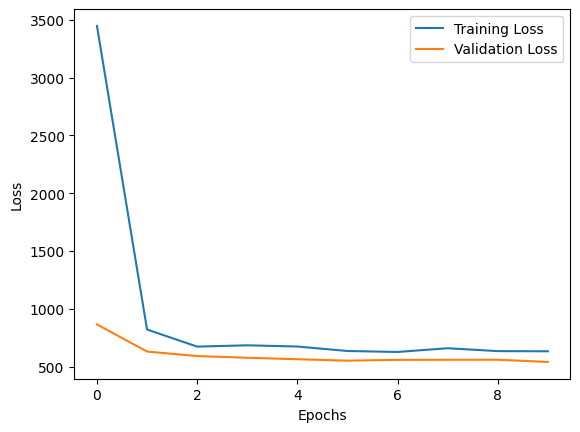

In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("/content/city_day.csv")

df = df.dropna()


df = df.select_dtypes(include=[np.number])

features = ['NO2', 'SO2', 'CO', 'O3', 'PM10']  # Adjust based on dataset columns
target = 'PM2.5'

X = df[features]
y = df[target]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the Sequential model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae}")

plt.plot(history.history['loss' ], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
predictions=model.predict(X_test)
predictions

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[ 24.63521 ],
       [110.01334 ],
       [ 34.938118],
       ...,
       [198.35672 ],
       [ 78.07011 ],
       [ 25.912384]], dtype=float32)

<function matplotlib.pyplot.show(close=None, block=None)>

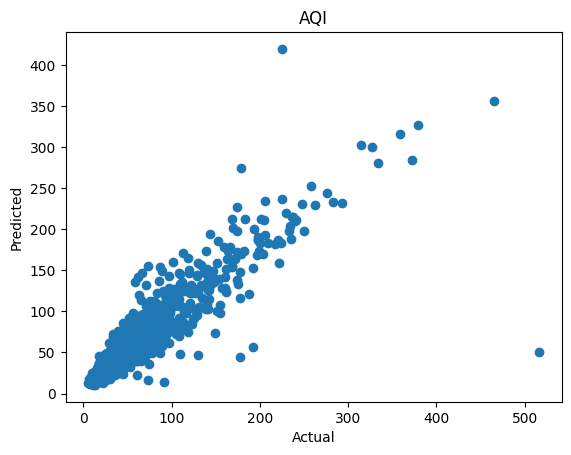

In [18]:
plt.scatter(y_test,predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('AQI')
plt.show